In [216]:
#Similar Players by Metrics

from nba_api.stats.endpoints import PlayerEstimatedMetrics
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Fetch estimated metrics data
metrics_data = PlayerEstimatedMetrics(season="2024-25", season_type="Regular Season").get_data_frames()[0]

# Select relevant columns (metrics only)
metrics_columns = ["PLAYER_ID", "PLAYER_NAME", "E_OFF_RATING", "E_DEF_RATING", "E_NET_RATING", 
                   "E_AST_RATIO", "E_OREB_PCT", "E_DREB_PCT", "E_TOV_PCT", "E_USG_PCT"]

#"E_REB_PCT"

# Clean the data (optional: drop rows with missing values)
metrics_data = metrics_data[metrics_columns].dropna()

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(metrics_data.iloc[:, 2:])  # Exclude PLAYER_ID and PLAYER_NAME from scaling

# Apply Nearest Neighbors
k_neighbors = 15  # Change this to find more or fewer similar players
nn = NearestNeighbors(n_neighbors=k_neighbors, metric="euclidean")
nn.fit(scaled_features)

# Function to find similar players
def find_similar_players(player_name, data, model, num_neighbors=5):
    idx = data.index[data["PLAYER_NAME"] == player_name].tolist()
    if not idx:
        return f"Player '{player_name}' not found."
    
    distances, indices = model.kneighbors([scaled_features[idx[0]]])
    similar_players = data.iloc[indices[0], :]["PLAYER_NAME"].tolist()
    
    return similar_players

# Example: Find 5 most similar players to a given player
player_name = "Jalen Brunson"  # Change to any player
similar_players = find_similar_players(player_name, metrics_data, nn, k_neighbors)
print(f"Players similar to {player_name}: {similar_players}")


Players similar to Jalen Brunson: ['Jalen Brunson', 'Devin Booker', 'Tyrese Maxey', 'Damian Lillard', "De'Aaron Fox", 'Stephen Curry', 'Kyrie Irving', 'Darius Garland', 'Jamal Murray', 'Malik Monk', 'DeMar DeRozan', 'CJ McCollum', 'Tyler Herro', 'Coby White', 'Stephon Castle']


In [115]:
# Similar Players By Metrics and Per Game Stats

from nba_api.stats.endpoints import PlayerEstimatedMetrics, LeagueDashPlayerStats
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Fetch estimated metrics data
metrics_data = PlayerEstimatedMetrics(season="2024-25", season_type="Regular Season").get_data_frames()[0]

# Fetch general player stats
player_data = LeagueDashPlayerStats().get_data_frames()[0]

# Select relevant columns
metrics_columns = ["PLAYER_ID", "PLAYER_NAME", "MIN", "E_OFF_RATING", "E_DEF_RATING", "E_NET_RATING", 
                   "E_AST_RATIO", "E_OREB_PCT", "E_DREB_PCT", "E_REB_PCT", "E_TOV_PCT", "E_USG_PCT"]
stats_columns = ["PLAYER_ID", "FG3M", "FG3_PCT", "FG_PCT", "GP", "PTS", "REB", "BLK", "STL", "AST"]

# Merge datasets on PLAYER_ID
merged_data = pd.merge(metrics_data[metrics_columns], player_data[stats_columns], on="PLAYER_ID")

# Compute per-game stats
merged_data["PPG"] = merged_data["PTS"] / merged_data["GP"]
merged_data["RPG"] = merged_data["REB"] / merged_data["GP"]
merged_data["BPG"] = merged_data["BLK"] / merged_data["GP"]
merged_data["SPG"] = merged_data["STL"] / merged_data["GP"]
merged_data["APG"] = merged_data["AST"] / merged_data["GP"]

# Drop unnecessary columns
merged_data = merged_data.drop(columns=["PLAYER_ID", "PTS", "GP", "REB", "BLK", "STL", "AST"])  # Keeping only per-game stats

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.iloc[:, 1:])  # Exclude PLAYER_NAME from scaling

# Apply Nearest Neighbors
k_neighbors = 15  # Change this to find more or fewer similar players
nn = NearestNeighbors(n_neighbors=k_neighbors, metric="euclidean")
nn.fit(scaled_features)

# Function to find similar players
def find_similar_players(player_name, data, model, num_neighbors=5):
    idx = data.index[data["PLAYER_NAME"] == player_name].tolist()
    if not idx:
        return f"Player '{player_name}' not found."
    
    distances, indices = model.kneighbors([scaled_features[idx[0]]])
    similar_players = data.iloc[indices[0], :]["PLAYER_NAME"].tolist()
    
    return similar_players

# Example: Find 5 most similar players to a given player
player_name = "Giannis Antetokounmpo"  # Change to any player
similar_players = find_similar_players(player_name, merged_data, nn, k_neighbors)
print(f"Players similar to {player_name}: {similar_players}")


Players similar to Giannis Antetokounmpo: ['Giannis Antetokounmpo', 'Alperen Sengun', 'Joel Embiid', 'Anthony Davis', 'Zion Williamson', 'Bam Adebayo', 'Evan Mobley', 'Karl-Anthony Towns', 'Paolo Banchero', 'Jalen Johnson', 'Scottie Barnes', 'Nikola Vučević', 'Domantas Sabonis', 'Julius Randle', 'Nikola Jokić']


In [212]:
# Similar Players By Shooting & Defense

from nba_api.stats.endpoints import PlayerEstimatedMetrics, LeagueDashPlayerStats
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Fetch estimated metrics data
metrics_data = PlayerEstimatedMetrics(season="2024-25", season_type="Regular Season").get_data_frames()[0]

# Fetch general player stats
player_data = LeagueDashPlayerStats().get_data_frames()[0]

# Select relevant columns
metrics_columns = ["PLAYER_ID", "PLAYER_NAME", "E_OFF_RATING", "E_DEF_RATING", "E_USG_PCT"]
stats_columns = ["PLAYER_ID", "FG3M", "FG3_PCT", "FG3A", "GP", "PTS", "STL"]

# Merge datasets on PLAYER_ID
merged_data = pd.merge(metrics_data[metrics_columns], player_data[stats_columns], on="PLAYER_ID")

# Compute per-game stats
merged_data["PPG"] = merged_data["PTS"] / merged_data["GP"]

# Drop unnecessary columns
merged_data = merged_data.drop(columns=["PLAYER_ID", "PTS", "GP"])  # Keeping only per-game stats

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.iloc[:, 1:])  # Exclude PLAYER_NAME from scaling

# Apply Nearest Neighbors
k_neighbors = 15  # Change this to find more or fewer similar players
nn = NearestNeighbors(n_neighbors=k_neighbors, metric="euclidean")
nn.fit(scaled_features)

# Function to find similar players
def find_similar_players(player_name, data, model, num_neighbors=5):
    idx = data.index[data["PLAYER_NAME"] == player_name].tolist()
    if not idx:
        return f"Player '{player_name}' not found."
    
    distances, indices = model.kneighbors([scaled_features[idx[0]]])
    similar_players = data.iloc[indices[0], :]["PLAYER_NAME"].tolist()
    
    return similar_players

# Example: Find 5 most similar players to a given player
player_name = "Derrick White"  # Change to any player
similar_players = find_similar_players(player_name, merged_data, nn, k_neighbors)
print(f"Players similar to {player_name}: {similar_players}")

Players similar to Derrick White: ['Derrick White', 'Payton Pritchard', 'Malik Beasley', 'Anfernee Simons', 'Coby White', 'Klay Thompson', 'Jalen Green', 'Tyrese Haliburton', 'Buddy Hield', 'Tyler Herro', 'Naz Reid', 'Dillon Brooks', 'Austin Reaves', 'Michael Porter Jr.', 'Darius Garland']


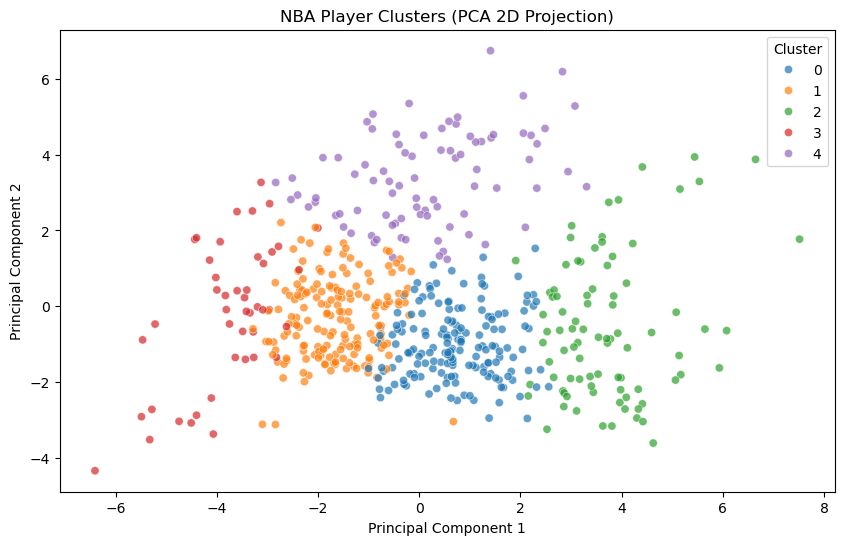

        PLAYER_NAME  Cluster
0    Jamaree Bouyea        1
1     James Wiseman        1
2    Tristen Newton        3
3      Jack McVeigh        1
4      N'Faly Dante        4
..              ...      ...
554  Ulrich Chomche        3
555   Justin Minaya        3
556  Daniss Jenkins        3
557     Zyon Pullin        3
558     P.J. Tucker        1

[559 rows x 2 columns]


In [192]:
from nba_api.stats.endpoints import PlayerEstimatedMetrics, LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Fetch estimated metrics data
metrics_data = PlayerEstimatedMetrics(season="2024-25", season_type="Regular Season").get_data_frames()[0]

# Fetch general player stats
player_data = LeagueDashPlayerStats().get_data_frames()[0]

# Select relevant columns
metrics_columns = ["PLAYER_ID", "PLAYER_NAME", "MIN", "E_OFF_RATING", "E_DEF_RATING", "E_NET_RATING", 
                   "E_AST_RATIO", "E_OREB_PCT", "E_DREB_PCT", "E_REB_PCT", "E_TOV_PCT", "E_USG_PCT"]
stats_columns = ["PLAYER_ID", "FG3M", "FG3_PCT", "FG_PCT", "GP", "PTS", "REB", "BLK", "STL", "AST"]

# Merge datasets on PLAYER_ID
merged_data = pd.merge(metrics_data[metrics_columns], player_data[stats_columns], on="PLAYER_ID")

# Filter for players who play at least x minutes per game
#merged_data = merged_data[merged_data["MIN"] >= 15]

# Compute per-game stats
merged_data["PPG"] = merged_data["PTS"] / merged_data["GP"]
merged_data["RPG"] = merged_data["REB"] / merged_data["GP"]
merged_data["BPG"] = merged_data["BLK"] / merged_data["GP"]
merged_data["SPG"] = merged_data["STL"] / merged_data["GP"]
merged_data["APG"] = merged_data["AST"] / merged_data["GP"]

# Drop unnecessary columns
merged_data = merged_data.drop(columns=["PLAYER_ID", "PTS", "GP", "REB", "BLK", "STL", "AST"])  # Keeping only per-game stats

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data.iloc[:, 1:])  # Exclude PLAYER_NAME from scaling

# Apply K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
merged_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
pca_df["Cluster"] = merged_data["Cluster"]
pca_df["PLAYER_NAME"] = merged_data["PLAYER_NAME"]

# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.7)
plt.title("NBA Player Clusters (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Display cluster assignments
print(merged_data[["PLAYER_NAME", "Cluster"]])



PCA Loadings (How each stat contributes to PC1 and PC2):
                   PC1       PC2
MIN          -0.097227  0.309296
E_OFF_RATING  0.000131  0.329661
E_DEF_RATING -0.107410 -0.129626
E_NET_RATING  0.062656  0.302444
E_AST_RATIO  -0.123994  0.264788
E_OREB_PCT    0.392163 -0.004857
E_DREB_PCT    0.352711  0.198744
E_REB_PCT     0.391052  0.146183
E_TOV_PCT     0.106224  0.086084
E_USG_PCT    -0.111447  0.346704
FG3M         -0.295378  0.121745
FG3_PCT      -0.245268  0.064213
FG_PCT        0.317602  0.110049
PPG          -0.102627  0.418767
RPG           0.375010  0.188091
BPG           0.270889 -0.000359
SPG          -0.086963  0.151895
APG          -0.156535  0.404837


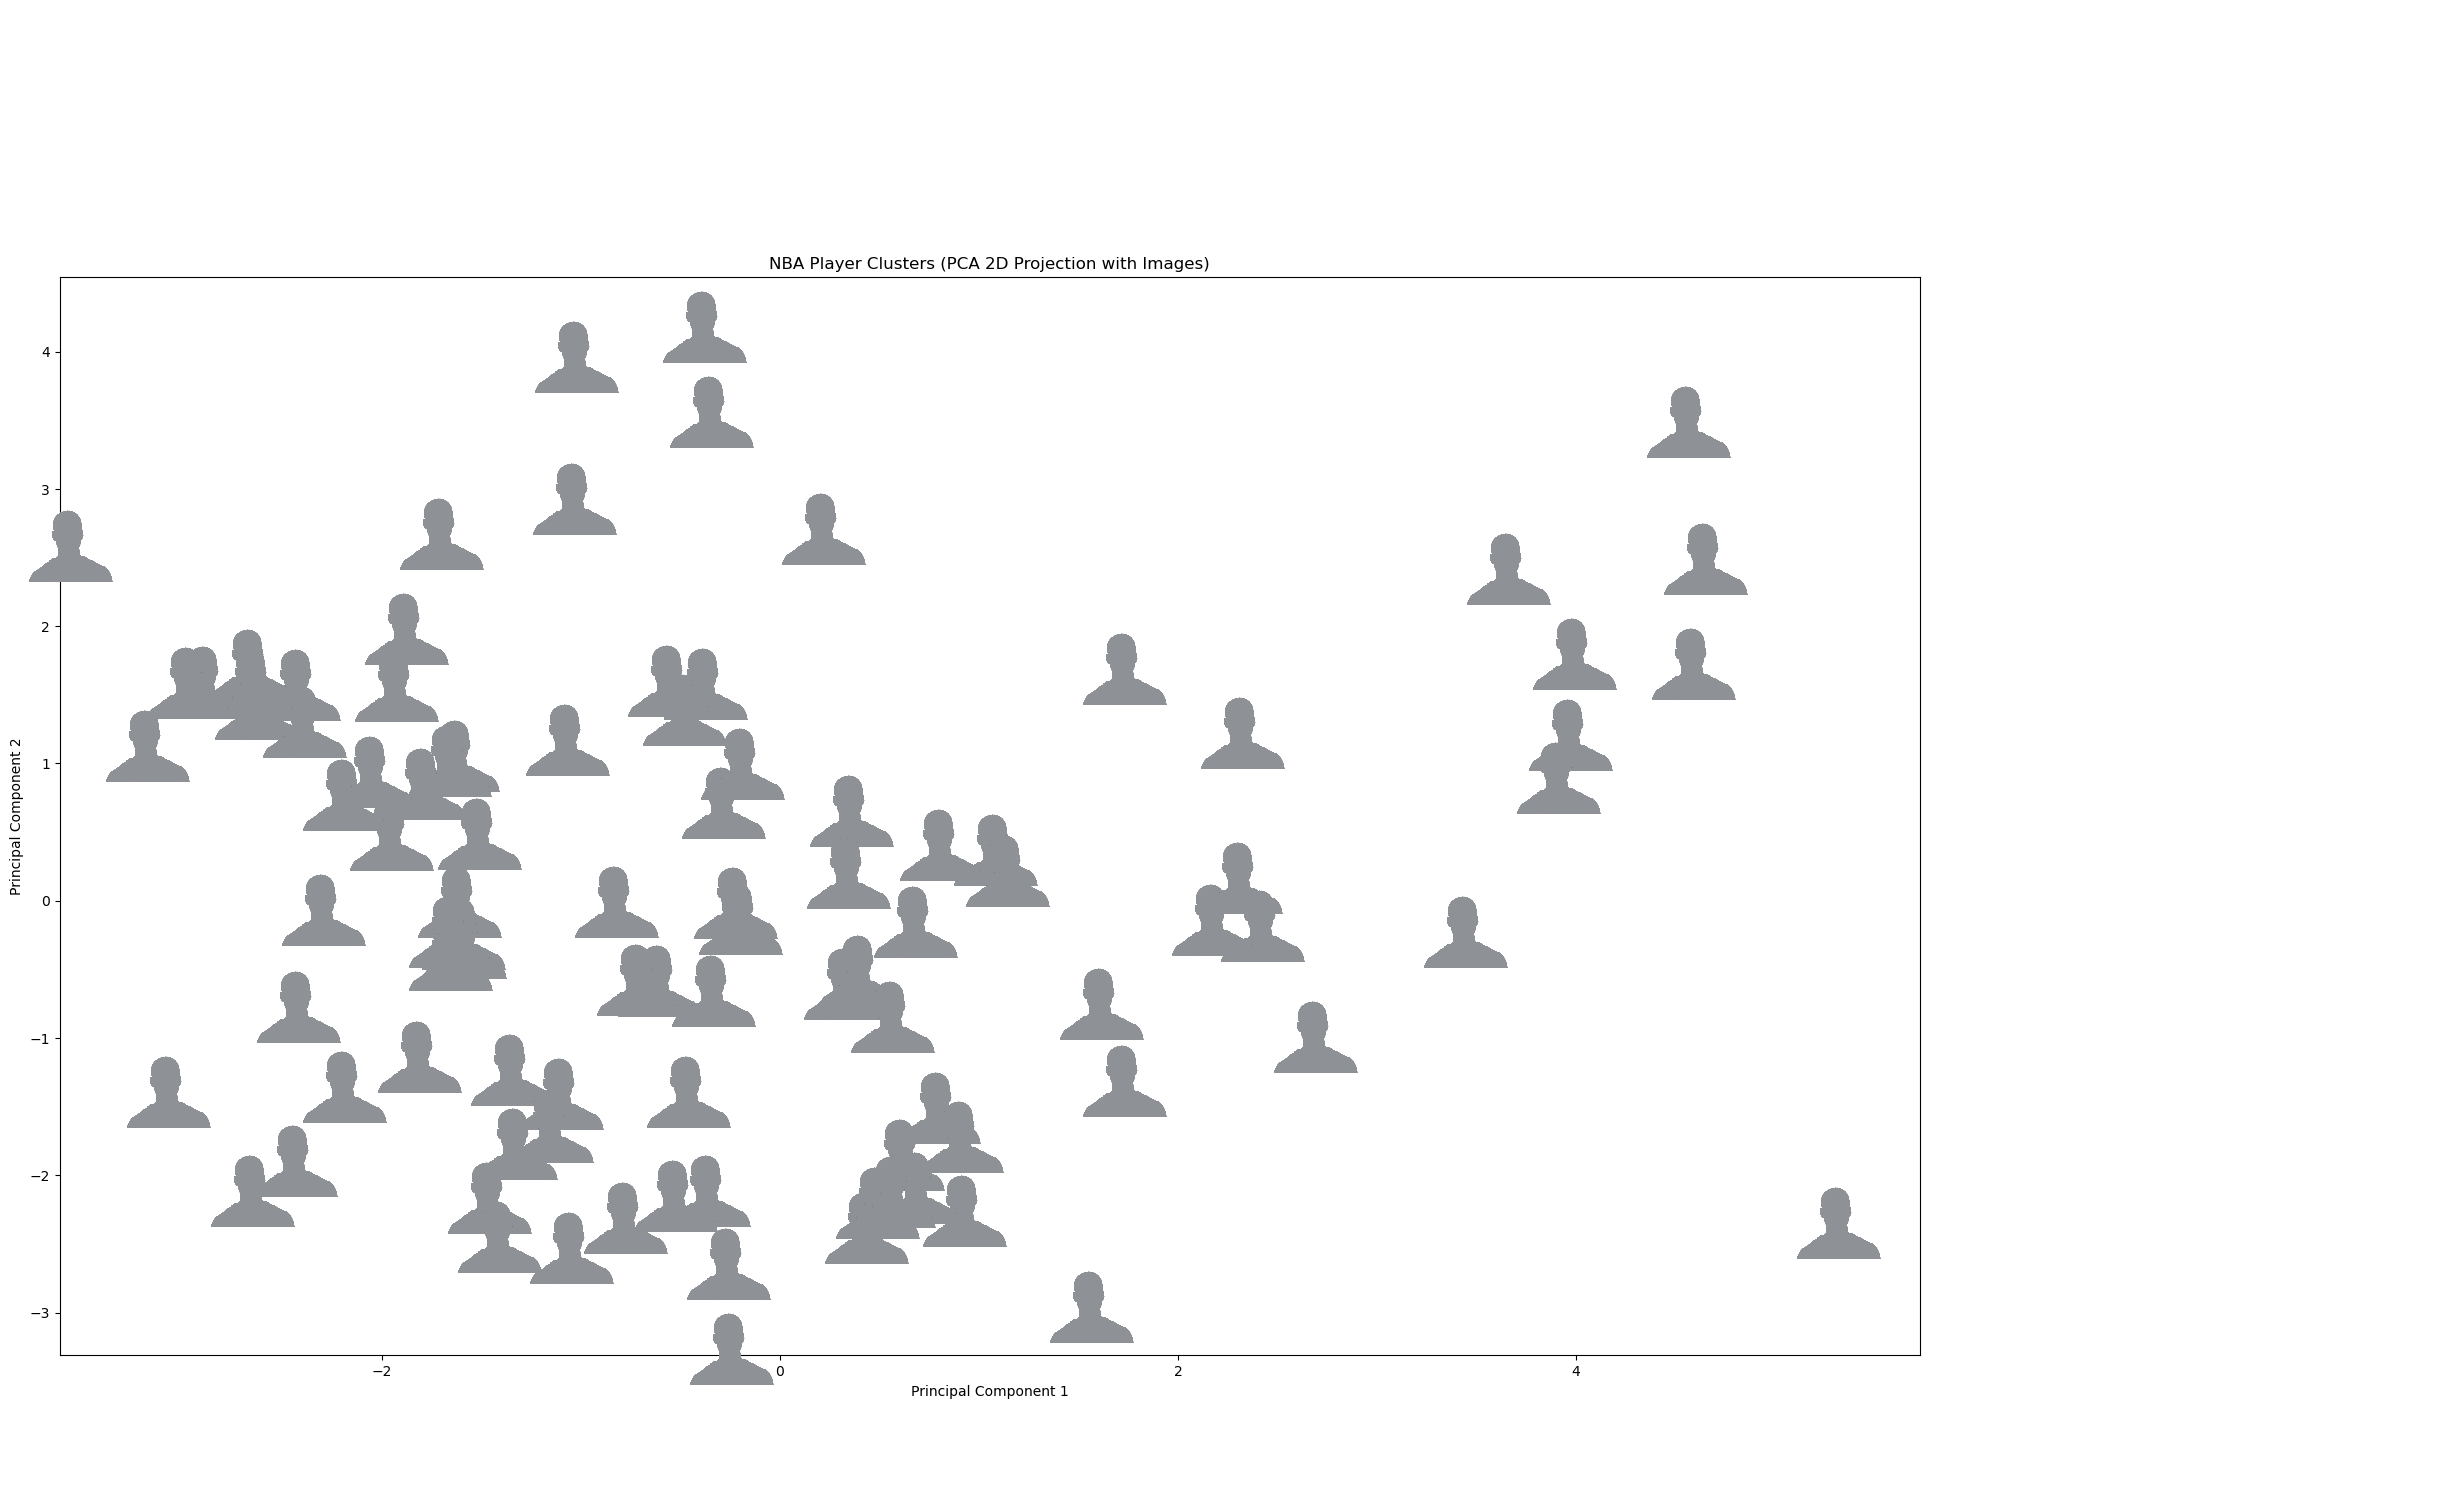

                  PLAYER_NAME  Cluster
15                  Ja Morant        0
229            Damian Lillard        0
256         Tyrese Haliburton        0
261              Jamal Murray        0
264               Jalen Green        0
272             Norman Powell        0
305              Kyrie Irving        0
314             Austin Reaves        0
327             DeMar DeRozan        0
333              LeBron James        0
356             Fred VanVleet        0
217                Malik Monk        0
370              James Harden        0
395              Kevin Durant        0
404           Anthony Edwards        0
407              Jayson Tatum        0
408             Mikal Bridges        0
412              Tyrese Maxey        0
427              Devin Booker        0
434             Derrick White        0
443              Franz Wagner        0
450             Jalen Brunson        0
483               Tyler Herro        0
387              Jaylen Brown        0
191          Donovan Mitc

In [226]:
from nba_api.stats.endpoints import PlayerEstimatedMetrics, LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.offsetbox as offsetbox
from io import BytesIO
import requests

# Fetch estimated metrics data
metrics_data = PlayerEstimatedMetrics(season="2024-25", season_type="Regular Season").get_data_frames()[0]

# Fetch general player stats
player_data = LeagueDashPlayerStats().get_data_frames()[0]

# Select relevant columns
metrics_columns = ["PLAYER_ID", "PLAYER_NAME", "MIN", "E_OFF_RATING", "E_DEF_RATING", "E_NET_RATING", 
                   "E_AST_RATIO", "E_OREB_PCT", "E_DREB_PCT", "E_REB_PCT", "E_TOV_PCT", "E_USG_PCT"]
stats_columns = ["PLAYER_ID", "FG3M", "FG3_PCT", "FG_PCT", "GP", "PTS", "REB", "BLK", "STL", "AST"]

# Merge datasets on PLAYER_ID
merged_data = pd.merge(metrics_data[metrics_columns], player_data[stats_columns], on="PLAYER_ID")

# Filter for players who play at least x minutes per game
merged_data = merged_data[merged_data["MIN"] >= 30]

# Compute per-game stats
merged_data["PPG"] = merged_data["PTS"] / merged_data["GP"]
merged_data["RPG"] = merged_data["REB"] / merged_data["GP"]
merged_data["BPG"] = merged_data["BLK"] / merged_data["GP"]
merged_data["SPG"] = merged_data["STL"] / merged_data["GP"]
merged_data["APG"] = merged_data["AST"] / merged_data["GP"]

# Drop unnecessary columns (keeping only per-game stats)
merged_data = merged_data.drop(columns=["PTS", "GP", "REB", "BLK", "STL", "AST"])

# Drop non-numeric columns before scaling
merged_data_numerical = merged_data.drop(columns=["PLAYER_NAME", "PLAYER_ID"])

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data_numerical)

# Recreate the DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=merged_data_numerical.columns)

# Apply K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
merged_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
pca_df["Cluster"] = merged_data["Cluster"]
pca_df["PLAYER_NAME"] = merged_data["PLAYER_NAME"]
pca_df["PLAYER_ID"] = merged_data["PLAYER_ID"]

# Get PCA loadings to interpret principal components
pca_loadings = pd.DataFrame(pca.components_.T, index=merged_data_numerical.columns, columns=["PC1", "PC2"])
print("\nPCA Loadings (How each stat contributes to PC1 and PC2):")
print(pca_loadings)

# Function to fetch player image URL
def get_player_image(player_id):
    return f"https://cdn.nba.com/headshots/nba/latest/1040x760/{player_id}.png"

# Plot PCA clusters with player images
plt.figure(figsize=(24, 14))  # Increased figure size
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.7, legend=False)

# Add player images to the scatter plot
ax = plt.gca()
for i, row in pca_df.iterrows():
    player_id = row["PLAYER_ID"]
    image_url = get_player_image(player_id)

    try:
        img_response = requests.get(image_url)
        img = plt.imread(BytesIO(img_response.content))
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(img, zoom=0.07), (row["PC1"], row["PC2"]), frameon=False)  # Adjusted image size
        ax.add_artist(imagebox)
    except Exception as e:
        print(f"Error fetching image for {row['PLAYER_NAME']}: {e}")

# Set plot titles and labels
plt.title("NBA Player Clusters (PCA 2D Projection with Images)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Sort by Cluster
ordered_df = merged_data[["PLAYER_NAME", "Cluster"]].sort_values(by="Cluster")

# Display sorted DataFrame with only PLAYER_NAME and Cluster
pd.set_option('display.max_rows', None)  # Show all rows
print(ordered_df)


PCA Loadings (How each stat contributes to PC1 and PC2):
                   PC1       PC2
MIN          -0.097227  0.309296
E_OFF_RATING  0.000131  0.329661
E_DEF_RATING -0.107410 -0.129626
E_NET_RATING  0.062656  0.302444
E_AST_RATIO  -0.123994  0.264788
E_OREB_PCT    0.392163 -0.004857
E_DREB_PCT    0.352711  0.198744
E_REB_PCT     0.391052  0.146183
E_TOV_PCT     0.106224  0.086084
E_USG_PCT    -0.111447  0.346704
FG3M         -0.295378  0.121745
FG3_PCT      -0.245268  0.064213
FG_PCT        0.317602  0.110049
PPG          -0.102627  0.418767
RPG           0.375010  0.188091
BPG           0.270889 -0.000359
SPG          -0.086963  0.151895
APG          -0.156535  0.404837


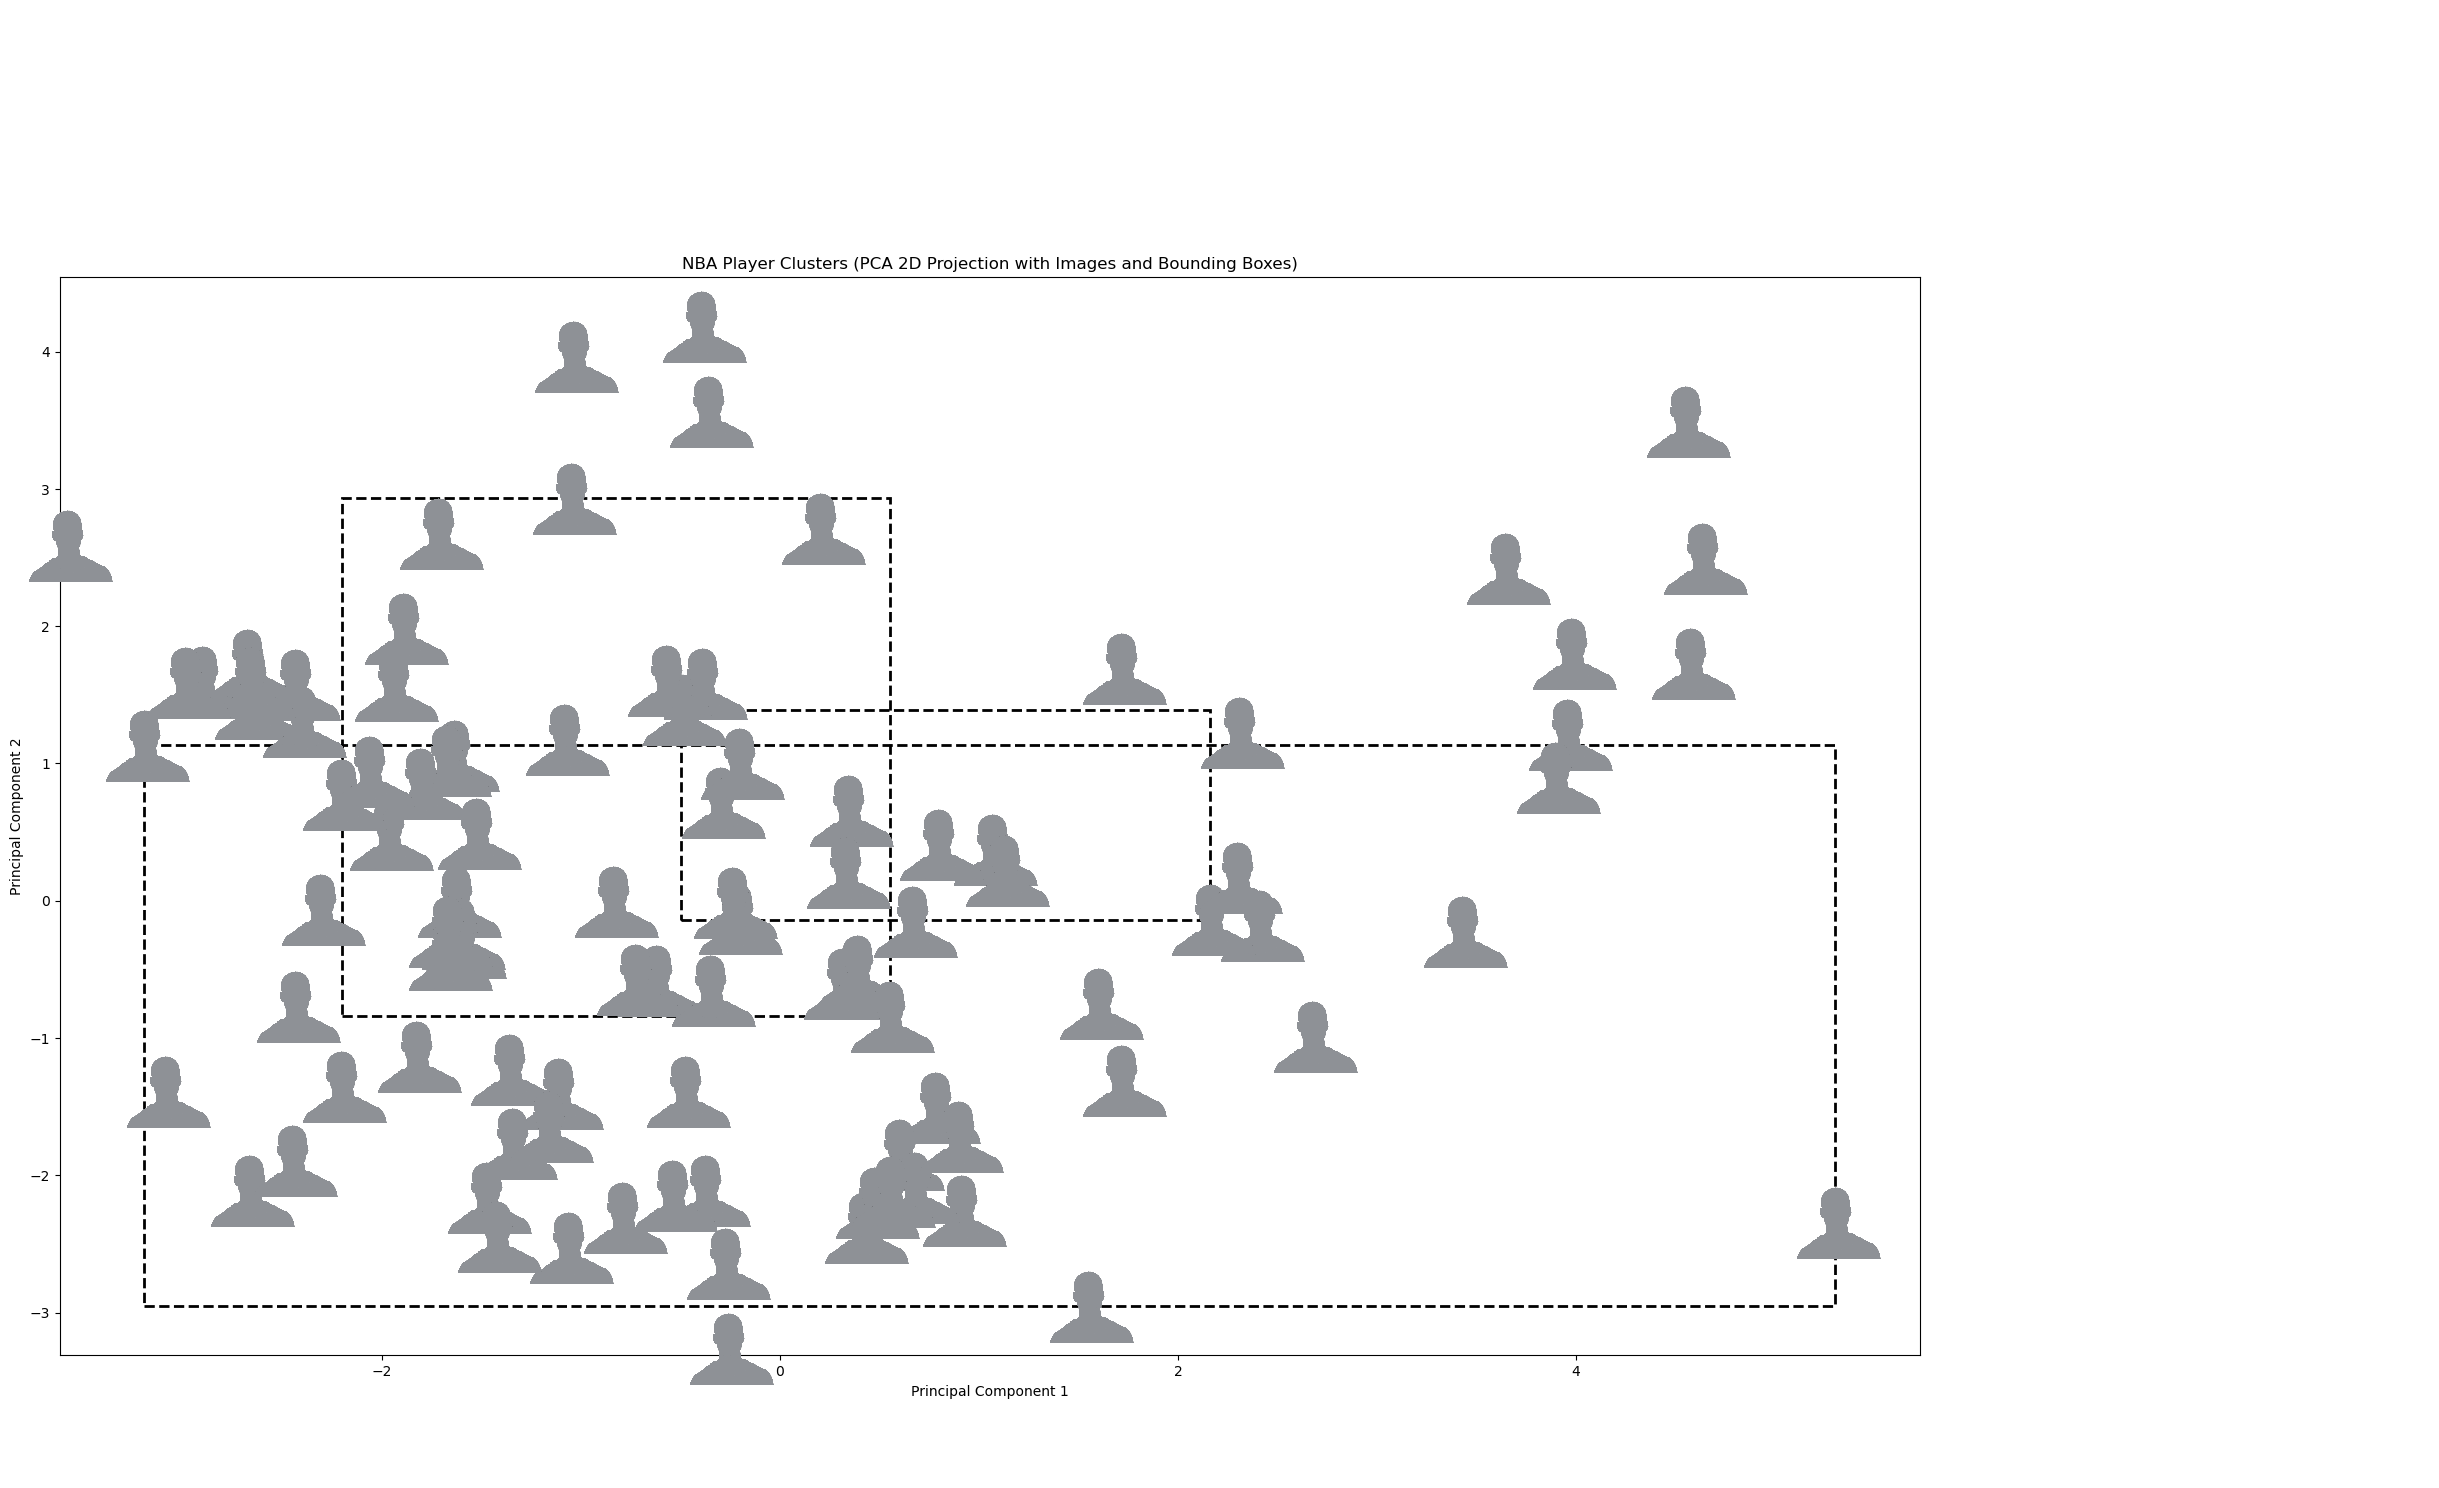

    PLAYER_NAME  Cluster
0           NaN      NaN
1           NaN      NaN
2           NaN      NaN
3           NaN      NaN
4           NaN      NaN
..          ...      ...
97          NaN      NaN
98          NaN      NaN
99          NaN      NaN
100         NaN      NaN
101  RJ Barrett      2.0

[102 rows x 2 columns]


In [164]:
from nba_api.stats.endpoints import PlayerEstimatedMetrics, LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.offsetbox as offsetbox
from matplotlib import patches
from io import BytesIO
import requests

# Fetch estimated metrics data
metrics_data = PlayerEstimatedMetrics(season="2024-25", season_type="Regular Season").get_data_frames()[0]

# Fetch general player stats
player_data = LeagueDashPlayerStats().get_data_frames()[0]

# Select relevant columns
metrics_columns = ["PLAYER_ID", "PLAYER_NAME", "MIN", "E_OFF_RATING", "E_DEF_RATING", "E_NET_RATING", 
                   "E_AST_RATIO", "E_OREB_PCT", "E_DREB_PCT", "E_REB_PCT", "E_TOV_PCT", "E_USG_PCT"]
stats_columns = ["PLAYER_ID", "FG3M", "FG3_PCT", "FG_PCT", "GP", "PTS", "REB", "BLK", "STL", "AST"]

# Merge datasets on PLAYER_ID
merged_data = pd.merge(metrics_data[metrics_columns], player_data[stats_columns], on="PLAYER_ID")

# Filter for players who play at least x minutes per game
merged_data = merged_data[merged_data["MIN"] >= 30]

# Compute per-game stats
merged_data["PPG"] = merged_data["PTS"] / merged_data["GP"]
merged_data["RPG"] = merged_data["REB"] / merged_data["GP"]
merged_data["BPG"] = merged_data["BLK"] / merged_data["GP"]
merged_data["SPG"] = merged_data["STL"] / merged_data["GP"]
merged_data["APG"] = merged_data["AST"] / merged_data["GP"]

# Drop unnecessary columns (keeping only per-game stats)
merged_data = merged_data.drop(columns=["PTS", "GP", "REB", "BLK", "STL", "AST"])

# Drop non-numeric columns before scaling
merged_data_numerical = merged_data.drop(columns=["PLAYER_NAME", "PLAYER_ID"])

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data_numerical)

# Recreate the DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=merged_data_numerical.columns)

# Apply K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
merged_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
pca_df["Cluster"] = merged_data["Cluster"]
pca_df["PLAYER_NAME"] = merged_data["PLAYER_NAME"]
pca_df["PLAYER_ID"] = merged_data["PLAYER_ID"]

# Get PCA loadings to interpret principal components
pca_loadings = pd.DataFrame(pca.components_.T, index=merged_data_numerical.columns, columns=["PC1", "PC2"])
print("\nPCA Loadings (How each stat contributes to PC1 and PC2):")
print(pca_loadings)

# Function to fetch player image URL
def get_player_image(player_id):
    return f"https://cdn.nba.com/headshots/nba/latest/1040x760/{player_id}.png"

# Plot PCA clusters with player images and bounding boxes
plt.figure(figsize=(24, 14))  # Increased figure size
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.7, legend=False)

# Add player images to the scatter plot
ax = plt.gca()
for i, row in pca_df.iterrows():
    player_id = row["PLAYER_ID"]
    image_url = get_player_image(player_id)

    try:
        img_response = requests.get(image_url)
        img = plt.imread(BytesIO(img_response.content))
        imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(img, zoom=0.07), (row["PC1"], row["PC2"]), frameon=False)  # Adjusted image size
        ax.add_artist(imagebox)
    except Exception as e:
        print(f"Error fetching image for {row['PLAYER_NAME']}: {e}")

# Add bounding boxes around each cluster
for cluster_id in range(num_clusters):
    # Get the points belonging to the current cluster
    cluster_data = pca_df[pca_df["Cluster"] == cluster_id]
    
    # Calculate the bounding box: min and max of PC1 and PC2 for the current cluster
    x_min, x_max = cluster_data["PC1"].min(), cluster_data["PC1"].max()
    y_min, y_max = cluster_data["PC2"].min(), cluster_data["PC2"].max()

    # Create a rectangle (bounding box) for the cluster
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor="black", facecolor="none", linestyle="--")
    ax.add_patch(rect)

# Set plot titles and labels
plt.title("NBA Player Clusters (PCA 2D Projection with Images and Bounding Boxes)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Display cluster assignments
print(pca_df[["PLAYER_NAME", "Cluster"]])
